<a href="https://colab.research.google.com/github/hansgura/NGG6050/blob/main/Gura_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Age 	Wing Length
3 	1.4
4 	1.5
5 	2.2
6 	2.4
7 	3.1
8 	3.2
9 	3.2
11 	3.9
12 	4.1
14 	4.7
15 	4.5
16 	5.2
17 	5.0

1. Plot the relationship between Age and Wing Length.
2. Calculate and plot the regression line.
3. Can you reject b = 0?
4. Calculate and plot the confidence intervals on the slope of the regression.
5. Calculate r^2 (the coefficient of determination)
6. Calculate Pearson's r.
7. Add some noise to the data and see how the regression changes.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
data = {'Age': [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17],
    'Wing Length': [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]}

df = pd.DataFrame(data)

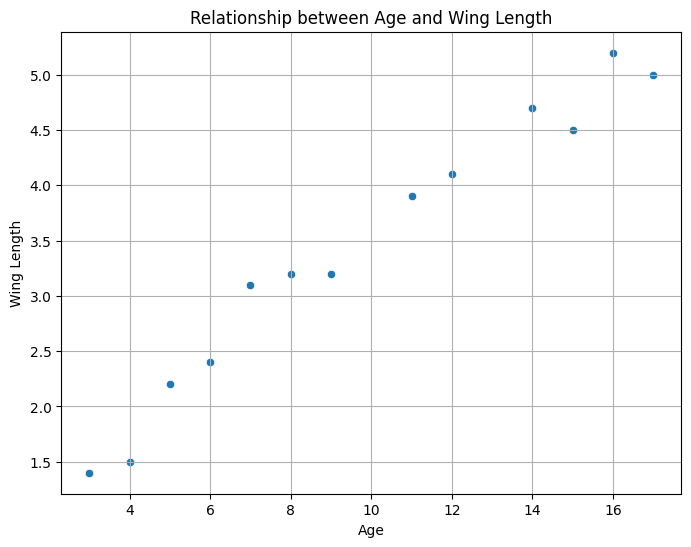

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Wing Length', data=df)
plt.title('Relationship between Age and Wing Length')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.grid(True)
plt.show()


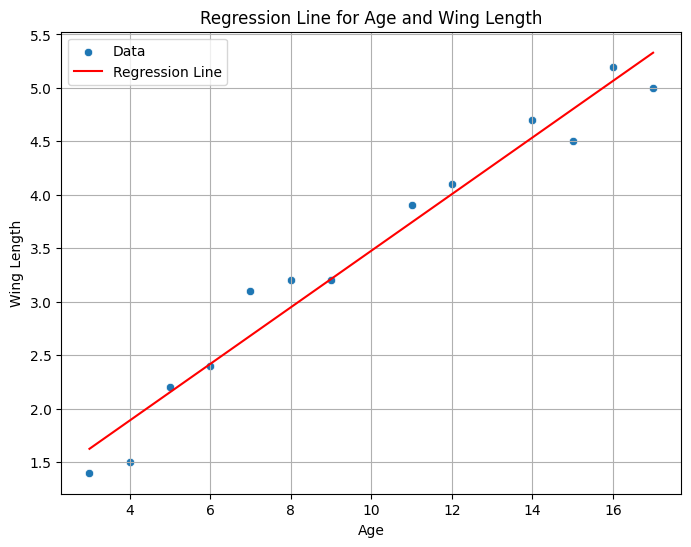

In [8]:
X = df['Age'].values.reshape(-1, 1)
y = df['Wing Length'].values

reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Wing Length', data=df, label='Data')
plt.plot(df['Age'], y_pred, color='red', label='Regression Line')
plt.title('Regression Line for Age and Wing Length')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Age'], df['Wing Length'])
print(f"p-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: b = 0 (slope ≠ 0)")
else:
    print("Fail to reject the null hypothesis: b = 0")


p-value: 3.0097431724571258e-09
Reject the null hypothesis: b = 0 (slope ≠ 0)


95% confidence interval for the slope: (0.23043927955854424, 0.2989289617618884)


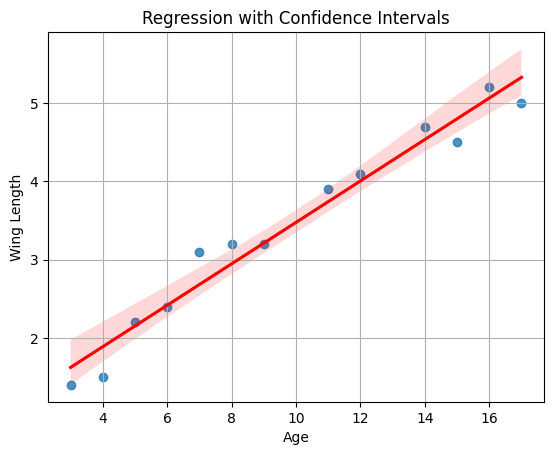

In [10]:
confidence_interval = stats.t.interval(0.95, len(df['Age']) - 2, loc=slope, scale=std_err)
print(f"95% confidence interval for the slope: {confidence_interval}")

sns.regplot(x='Age', y='Wing Length', data=df, ci=95, line_kws={"color": "red"})
plt.title('Regression with Confidence Intervals')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.grid(True)
plt.show()

In [11]:
r_squared = r2_score(y, y_pred)
print(f"R-squared: {r_squared}")

R-squared: 0.9633822518042856


In [12]:
pearson_r, pearson_p = stats.pearsonr(df['Age'], df['Wing Length'])
print(f"Pearson's r: {pearson_r}")

Pearson's r: 0.981520377681628


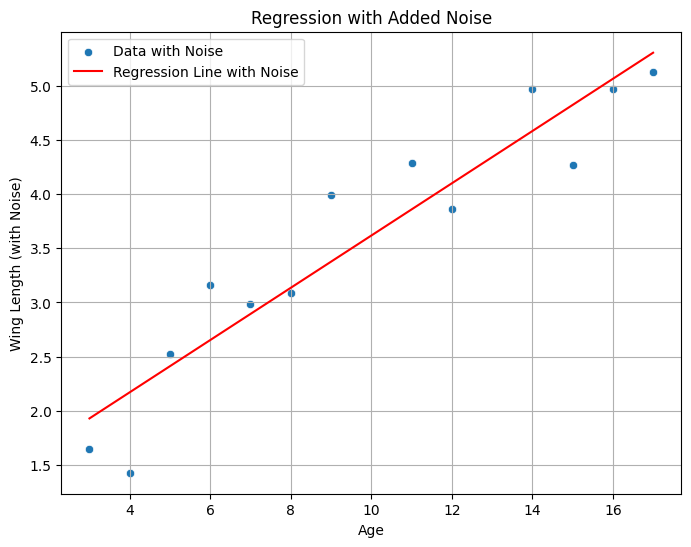

In [14]:
np.random.seed(42)
noise = np.random.normal(0, 0.5, size=len(df['Wing Length']))
df['Wing Length (with noise)'] = df['Wing Length'] + noise

reg_with_noise = LinearRegression().fit(X, df['Wing Length (with noise)'])
y_pred_with_noise = reg_with_noise.predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Wing Length (with noise)', data=df, label='Data with Noise')
plt.plot(df['Age'], y_pred_with_noise, color='red', label='Regression Line with Noise')
plt.title('Regression with Added Noise')
plt.xlabel('Age')
plt.ylabel('Wing Length (with Noise)')
plt.legend()
plt.grid(True)
plt.show()